# Data preparation

We combine the data, convert the labels for classification and apply augmentation

In [1]:
import os, sys, math, json
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
print("Tensorflow version " + tf.__version__)
AUTOTUNE = tf.data.AUTOTUNE

np.random.seed(0)

IMAGE_SIZE = [32, 32]

Tensorflow version 2.7.0


In [2]:
df = pd.read_json('../data/labelled_data/prepared-samples-binary.json')

y = df['label'].to_numpy()
X = np.array(df['data'].to_list())
X = np.expand_dims(X, axis=3)
print(y.shape)
print(X.shape)

(200,)
(200, 32, 32, 1)


In [3]:
# Create train / val / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [4]:
# Simple Cnn Model

x = tf.keras.layers.Input(shape=[*IMAGE_SIZE,1]) # input is 32x32 pixels RGB
y = tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', use_bias=True, activation='relu')(x)
y = tf.keras.layers.GlobalAveragePooling2D()(y)
y = tf.keras.layers.Dense(64)(y)
y = tf.keras.layers.Dense(32)(y)
y = tf.keras.layers.Dropout(0.2)(y)
y = tf.keras.layers.Dense(2, activation='softmax')(y)

model = tf.keras.Model(x, y)

model.compile(
optimizer='adam',
loss= 'sparse_categorical_crossentropy',
metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 global_average_pooling2d (G  (None, 32)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                             

2021-11-29 16:16:26.294863: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-29 16:16:26.295773: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


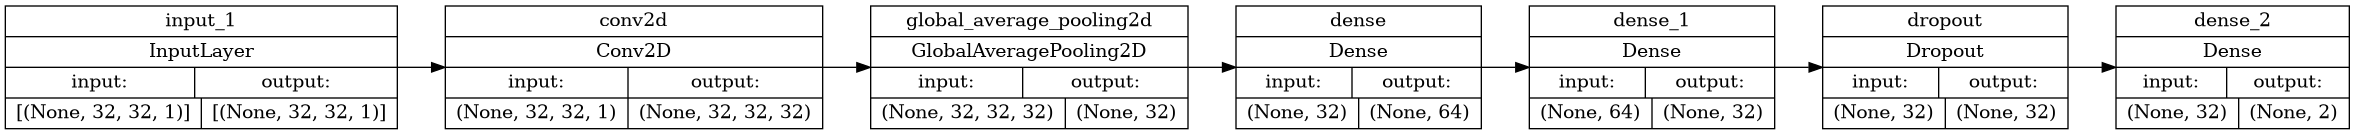

In [5]:
# Plot the model
# `rankdir='LR'` is to make the graph horizontal.
%matplotlib inline
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

Epoch 1/50
8/8 [==============================] - 1s 50ms/step - loss: 1.1423 - accuracy: 0.5167 - val_loss: 1.1270 - val_accuracy: 0.3500
Epoch 2/50
8/8 [==============================] - 0s 21ms/step - loss: 1.1559 - accuracy: 0.4500 - val_loss: 0.9656 - val_accuracy: 0.6500
Epoch 3/50
8/8 [==============================] - 0s 27ms/step - loss: 1.1440 - accuracy: 0.4583 - val_loss: 0.7572 - val_accuracy: 0.3500
Epoch 4/50
8/8 [==============================] - 0s 13ms/step - loss: 0.8400 - accuracy: 0.5500 - val_loss: 0.7268 - val_accuracy: 0.6500
Epoch 5/50
8/8 [==============================] - 0s 23ms/step - loss: 0.6956 - accuracy: 0.6167 - val_loss: 0.6844 - val_accuracy: 0.6500
Epoch 6/50
8/8 [==============================] - 0s 24ms/step - loss: 0.7458 - accuracy: 0.5333 - val_loss: 0.7036 - val_accuracy: 0.6500
Epoch 7/50
8/8 [==============================] - 0s 27ms/step - loss: 0.8035 - accuracy: 0.6250 - val_loss: 0.6633 - val_accuracy: 0.6500
Epoch 8/50
8/8 [===========

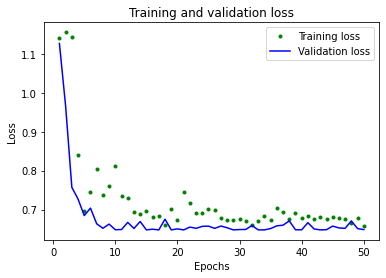

Test loss: 0.6839284300804138 / Test accuracy: 0.6000000238418579


In [6]:
# Fit the model
EPOCHS = 50
BATCH_SIZE = 16
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Plot training history
plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("simpleCnn-eval.png")
plt.show()

# Generate generalization metrics
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

In [7]:
# make and show single prediciton
%matplotlib inline

n=4 # pics per row

label = {1: 'Human',
         0: 'No Human'}

pred = model.predict(X_test)

classes = np.argmax(pred, axis = 1)

print(pred, classes)

[[0.67007345 0.32992652]
 [0.66823244 0.3317675 ]
 [0.667028   0.33297205]
 [0.6671095  0.33289054]
 [0.6680813  0.33191875]
 [0.67008716 0.3299128 ]
 [0.66745    0.33254993]
 [0.66726834 0.33273163]
 [0.66802067 0.33197933]
 [0.6660872  0.3339128 ]
 [0.66821647 0.3317835 ]
 [0.6659938  0.33400622]
 [0.66502583 0.33497417]
 [0.66500026 0.3349997 ]
 [0.66762805 0.332372  ]
 [0.6704455  0.3295545 ]
 [0.66696185 0.33303815]
 [0.66773456 0.33226538]
 [0.6669304  0.33306962]
 [0.66740465 0.3325953 ]
 [0.667229   0.33277097]
 [0.66514885 0.33485115]
 [0.6669995  0.3330005 ]
 [0.6655511  0.33444884]
 [0.6671313  0.3328687 ]
 [0.6662522  0.33374783]
 [0.6697866  0.33021343]
 [0.6674387  0.33256134]
 [0.66852754 0.33147246]
 [0.66782445 0.33217564]
 [0.66702783 0.33297217]
 [0.6653558  0.33464423]
 [0.6671207  0.33287925]
 [0.6657735  0.3342265 ]
 [0.67023194 0.3297681 ]
 [0.6660831  0.33391693]
 [0.66992885 0.33007112]
 [0.66509354 0.33490643]
 [0.66839635 0.33160362]
 [0.6655703  0.33442968]]

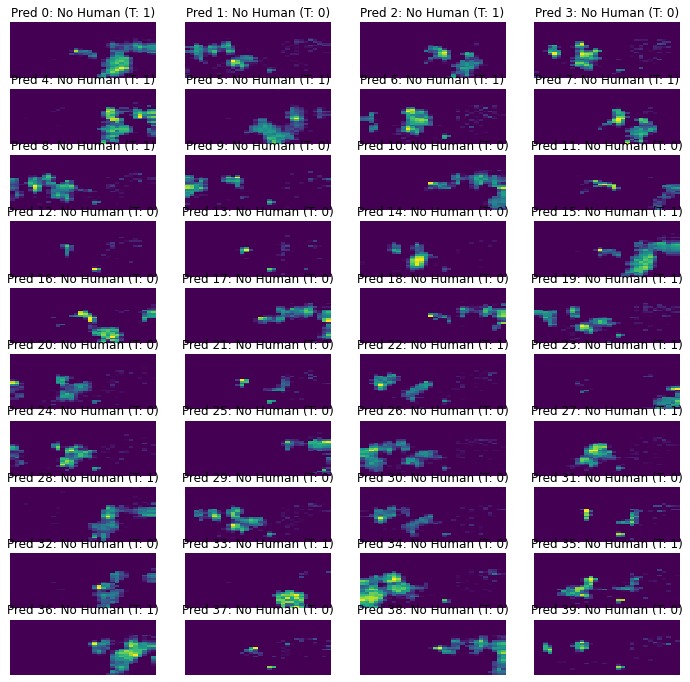

In [8]:
# Print predictions
fig, axes = plt.subplots(nrows=int(len(X_test)/n), ncols=n, figsize=(n*3, n*3), num='Predictions')
for ax, idx in zip(axes.reshape(-1), range(len(X_test))): 
    ax.set_axis_off()
    ax.set_title('Pred %i: %s (T: %i)' % (idx, label[classes[idx]], y_test[idx]))
    ax.imshow(X_test[idx].reshape(32, 32), interpolation='nearest', aspect='auto')

In [9]:
# Export saved model
tf.keras.models.save_model(model, "simpleCnn-binary.h5")